#### Importing the needed Modules/ Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
import string
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
np.random.seed(42)

#### Loading the Dataset & the NLP model

In [2]:
data = pd.read_csv("toxic_comments.csv")
data = data.iloc[0:1000, :]
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
punctuations = string.punctuation

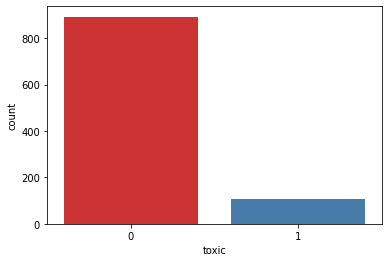

In [3]:
# Visualizing ratio of toxic vs non-toxic comments
sns.countplot(x='toxic', data=data, palette='Set1')
plt.show()

#### Creating our tokenizer to remove uneccessary words and characters.

In [4]:
def tokenizer(sentence):
  doc = nlp(sentence)
  tokens = [word.lemma_.lower().strip() for word in doc]
  tokens = [word for word in tokens if word not in stop_words and word not in punctuations]
  return tokens

### Vectorizing our text data into numbers for NLP

In [5]:
count_vector = CountVectorizer(tokenizer=tokenizer)
tfidf_vector = TfidfVectorizer(tokenizer=tokenizer)
# test to understand Tokenization & Vectorization
test_example = count_vector.fit_transform(["I loved chicken and rice. but to adjucate the lamb is to characterize the wolf. also chicken", 
                            "The chicken and the lamb were good."]).toarray()
print(f'Sentence 1 tokenized: {tokenizer("I loved chicken and rice. but to adjucate the lamb is to characterize the wolf. also chicken")}')
print(f'Sentence 2 tokenized: {tokenizer("The chicken and the lamb were good.")}')
print(f'List of all features: {count_vector.get_feature_names_out()}')
print(f'Frequency of each word: {count_vector.vocabulary_}')
print(f'Vectorized Output: {test_example}')


Sentence 1 tokenized: ['love', 'chicken', 'rice', 'adjucate', 'lamb', 'characterize', 'wolf', 'chicken']
Sentence 2 tokenized: ['chicken', 'lamb', 'good']
List of all features: ['adjucate' 'characterize' 'chicken' 'good' 'lamb' 'love' 'rice' 'wolf']
Frequency of each word: {'love': 5, 'chicken': 2, 'rice': 6, 'adjucate': 0, 'lamb': 4, 'characterize': 1, 'wolf': 7, 'good': 3}
Vectorized Output: [[1 1 2 0 1 1 1 1]
 [0 0 1 1 1 0 0 0]]


##### Splitting our dataset into Training and Test

In [6]:
from sklearn.model_selection import train_test_split

X, y = data['text'], data['toxic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

X_train_vectors = count_vector.fit_transform(X_train).toarray()
X_test_vectors = count_vector.transform(X_test).toarray()

X_train_vectors_tfid = tfidf_vector.fit_transform(X_train).toarray()
X_test_vectors_tfid = tfidf_vector.transform(X_test).toarray()

#### Logistic Regression Method

In [7]:
from sklearn.linear_model import LogisticRegression
lr, lr_tfid = LogisticRegression(), LogisticRegression()
lr.fit(X_train_vectors, y_train)
y_pred = lr.predict(X_test_vectors)
print(f"Accuracy is: {metrics.accuracy_score(y_pred, y_test)}")

lr_tfid.fit(X_train_vectors_tfid, y_train)
y_pred_tfid = lr_tfid.predict(X_test_vectors_tfid)
print(f"Accuracy with TFID is: {metrics.accuracy_score(y_pred_tfid, y_test)}")

Accuracy is: 0.925
Accuracy with TFID is: 0.9


#### K- Nearest neighbors Classifier Method

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn, knn_tfid = KNeighborsClassifier(), KNeighborsClassifier()
knn.fit(X_train_vectors, y_train)
y_pred = knn.predict(X_test_vectors)
print(f"Accuracy is: {metrics.accuracy_score(y_pred, y_test)}")

knn_tfid.fit(X_train_vectors_tfid, y_train)
y_pred_tfid = knn_tfid.predict(X_test_vectors_tfid)
print(f"Accuracy with TFID is: {metrics.accuracy_score(y_pred_tfid, y_test)}")

Accuracy is: 0.905
Accuracy with TFID is: 0.92


#### Gradient Booster Classifier Method

In [9]:
from sklearn.ensemble import GradientBoostingClassifier
gb, gb_tfid = GradientBoostingClassifier(random_state=0), GradientBoostingClassifier(random_state=0)
gb.fit(X_train_vectors, y_train)
y_pred = gb.predict(X_test_vectors)
print(f"Accuracy is: {metrics.accuracy_score(y_pred, y_test)}")

gb_tfid.fit(X_train_vectors_tfid, y_train)
y_pred_tfid = gb_tfid.predict(X_test_vectors_tfid)
print(f"Accuracy with TFID is: {metrics.accuracy_score(y_pred_tfid, y_test)}")

Accuracy is: 0.925
Accuracy with TFID is: 0.93


#### Random Forest Classifier Method

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf, rf_tfid = RandomForestClassifier(), RandomForestClassifier()
rf.fit(X_train_vectors, y_train)
y_pred = rf.predict(X_test_vectors)
print(f"Accuracy is: {metrics.accuracy_score(y_pred, y_test)}")

rf_tfid.fit(X_train_vectors_tfid, y_train)
y_pred_tfid = rf_tfid.predict(X_test_vectors_tfid)
print(f"Accuracy with TFID is: {metrics.accuracy_score(y_pred_tfid, y_test)}")

Accuracy is: 0.92
Accuracy with TFID is: 0.915


#### Naive Bayes Classifier Method

In [11]:
from sklearn.naive_bayes import GaussianNB
nb, nb_tfid = GaussianNB(), GaussianNB()
nb.fit(X_train_vectors, y_train)
y_pred = nb.predict(X_test_vectors)
print(f"Accuracy is: {metrics.accuracy_score(y_pred, y_test)}")

nb_tfid.fit(X_train_vectors_tfid, y_train)
y_pred_tfid = nb_tfid.predict(X_test_vectors_tfid)
print(f"Accuracy with TFID is: {metrics.accuracy_score(y_pred_tfid, y_test)}")

Accuracy is: 0.835
Accuracy with TFID is: 0.835


### Decision Tree Classifier Method

In [12]:
from sklearn.tree import DecisionTreeClassifier
dt, dt_tfid = DecisionTreeClassifier(), DecisionTreeClassifier()
dt.fit(X_train_vectors, y_train)
y_pred = dt.predict(X_test_vectors)
print(f"Accuracy is: {metrics.accuracy_score(y_pred, y_test)}")

dt_tfid.fit(X_train_vectors_tfid, y_train)
y_pred_tfid = dt_tfid.predict(X_test_vectors_tfid)
print(f"Accuracy with TFID is: {metrics.accuracy_score(y_pred_tfid, y_test)}")

Accuracy is: 0.9
Accuracy with TFID is: 0.91
